**Name:**
1.   Krittin Nisunarat 6280782
2.   Khwanchanok Chaichanayothinwatchara 6280164
3.   Vanessa Rujipatanakul 6280204
4.   Pornkamol Luthra 6280012

### Happiness vs. Corruption

In [174]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [114]:
happiness_df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
happiness_df = happiness_df.drop(columns=['family', 'dystopia_residual'])
social_support_df = happiness_df[happiness_df['Year'] > 2016].replace(0, np.nan).dropna()
no_social_support_df = happiness_df.drop(columns=['social_support']).replace(0, np.nan).dropna()

### Find correlation between dataset

In [121]:
def find_coorelation(df):
    corr = df.corr()
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    for column in corr.columns:
        corr[column][column] = 0.0
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return corr.describe()

/var/folders/vr/6l9k0t7n045f_gx40s7flt380000gn/T/ipykernel_41442/3594420530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,happiness_score,gdp_per_capita,health,freedom,generosity,government_trust,Year,social_support,cpi_score
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.461004,0.408708,0.404425,0.338540,0.096628,0.322623,0.023864,0.354524,0.425142
std,0.325046,0.366744,0.346538,0.159207,0.131039,0.196864,0.082824,0.330118,0.300258
min,0.000000,-0.042690,-0.016933,0.000000,-0.042690,0.000000,-0.092734,-0.092734,0.000000
25%,0.132264,0.000000,0.000000,0.304255,0.000000,0.221255,-0.016933,0.024945,0.127829
50%,0.531788,0.368725,0.376948,0.376948,0.035903,0.368725,0.005032,0.382051,0.504319
75%,0.745910,0.726748,0.678225,0.444022,0.132264,0.444022,0.035903,0.678225,0.670153
max,0.787767,0.813149,0.813149,0.531788,0.304255,0.651906,0.194106,0.745910,0.708847


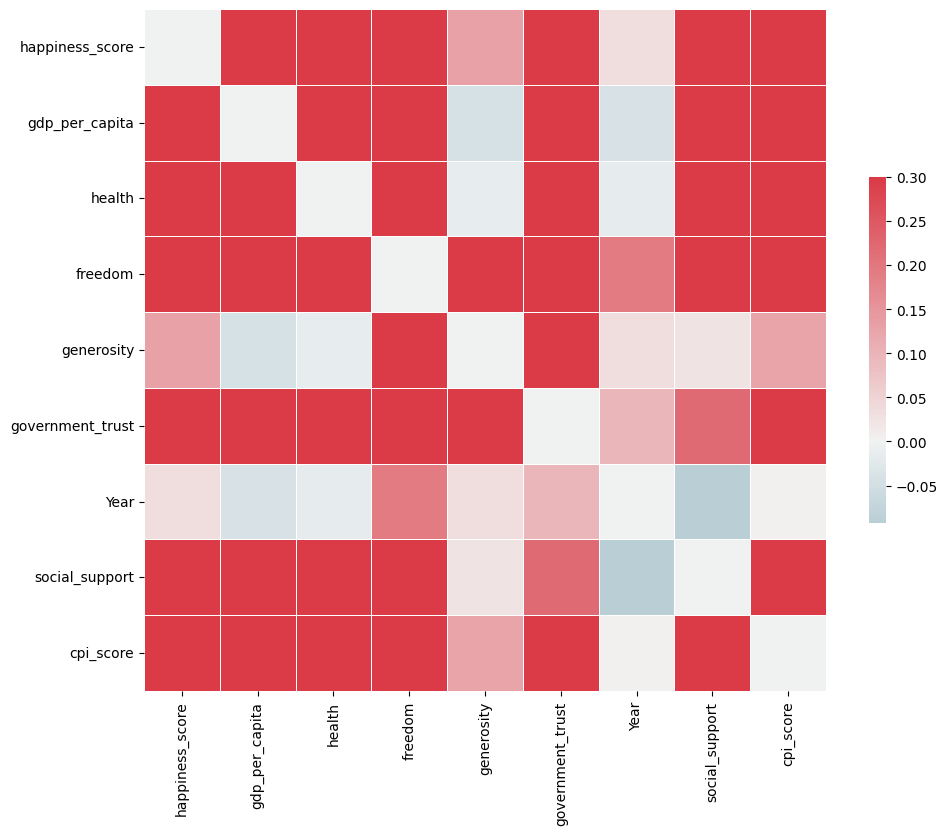

In [122]:
# With social support
find_coorelation(social_support_df)

/var/folders/vr/6l9k0t7n045f_gx40s7flt380000gn/T/ipykernel_41442/3594420530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,happiness_score,gdp_per_capita,health,freedom,generosity,government_trust,Year,cpi_score
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.429188,0.368910,0.372571,0.327798,0.095256,0.317878,0.007631,0.415764
std,0.326688,0.357800,0.331301,0.199150,0.149059,0.216194,0.057938,0.308656
min,0.000000,-0.028932,-0.016377,0.000000,-0.106708,0.000000,-0.106708,0.000000
25%,0.122725,-0.002779,0.058155,0.235170,-0.012433,0.215854,-0.007233,0.128225
50%,0.500679,0.359708,0.368282,0.382209,0.076784,0.345781,0.011759,0.555711
75%,0.708464,0.720986,0.677109,0.472899,0.198150,0.458976,0.039005,0.659309
max,0.795855,0.795855,0.772122,0.545431,0.291749,0.624193,0.077540,0.703940


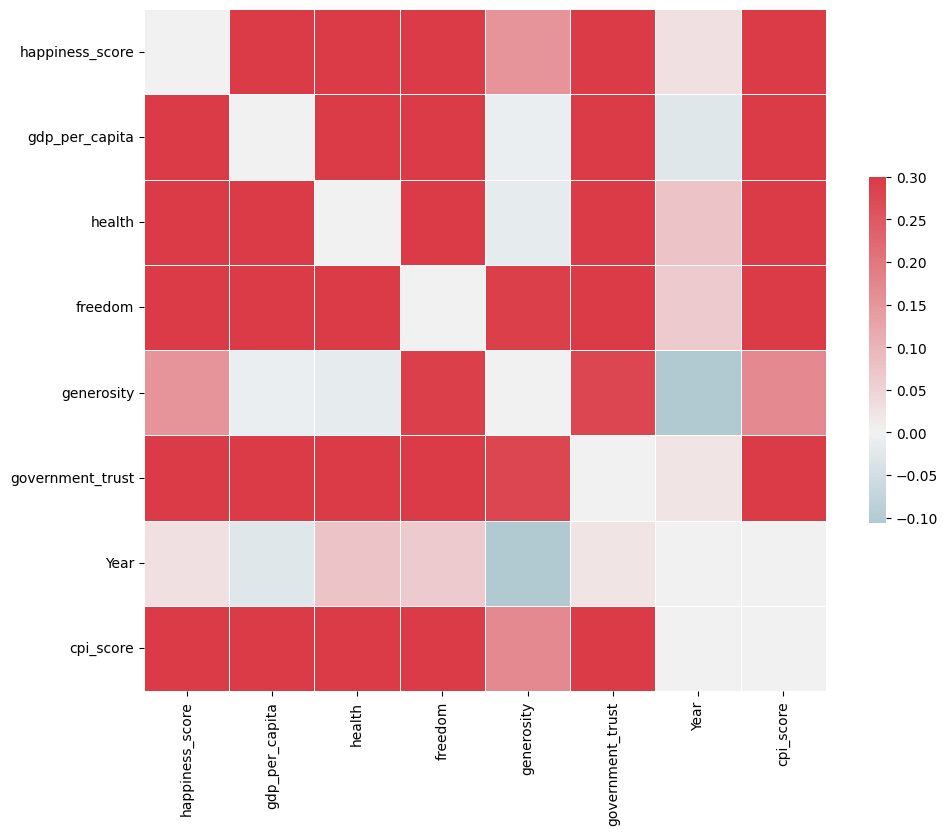

In [123]:
# Without social support
find_coorelation(no_social_support_df)

### GDP Per Capita vs Generosity
**Interested Question:** What make people more generous?

### GDP Per Capita vs Health
**Interested Question:** How does GDP per capita impact health?

### CPI Score vs Government Trust
**Interested Question:** How does each country's cpi score impact citizen's trust in government?

In [163]:
cpi = happiness_df.groupby('Country')['cpi_score'].mean()
gov = happiness_df.groupby('Country')['government_trust'].mean()
cpi_gov_df = pd.concat([cpi, gov], axis=1)

In [184]:
def exponential_curve_fit(x, a, b, c):
    return a*(x**b) + c

fitted_model, _ = curve_fit(exponential_curve_fit,xdata=cpi_gov_df['cpi_score'],ydata=cpi_gov_df['government_trust'])
fitted_model

array([2.26178210e-13, 6.27500465e+00, 8.58436923e-02])

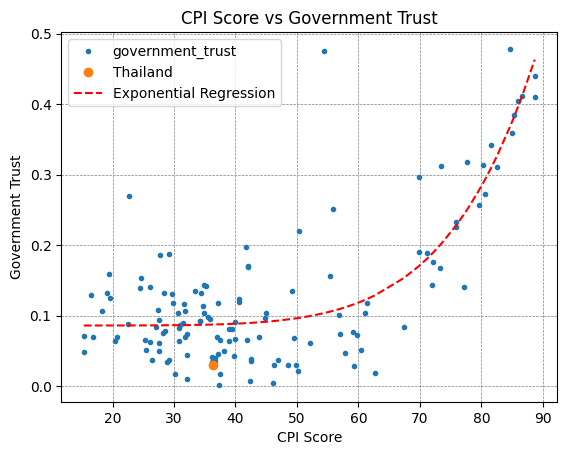

In [219]:
cpi_gov_df.plot(x='cpi_score',y='government_trust', style='.')
xs = cpi_gov_df['cpi_score'].sort_values()
plt.plot(cpi_gov_df['cpi_score']['Thailand'], cpi_gov_df['government_trust']['Thailand'], 'o', lw=10, label="Thailand")
plt.plot(xs, exponential_curve_fit(xs, *fitted_model), 'r--',label='Exponential Regression')
plt.xlabel('CPI Score')
plt.ylabel('Government Trust')
plt.title('CPI Score vs Government Trust')
plt.grid(color='gray', linestyle='--', lw=0.5)
plt.legend()